# 全球抗“疫”：用Python带你了解世界疫情

## 1. 读取数据及处理

In [1]:
import pandas as pd
import numpy as np 

In [2]:
#疫情的确诊数（confirmed）
confirmed_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(confirmed_path)
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,410
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [3]:
#治愈数
recovered_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recovered = pd.read_csv(recovered_path)
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,413,474,539,597,637,663,712,744,792,821
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,145,153,169,178,189,198,215,235,248,257
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,274,299,316,328,335,349,372,384,401,422
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,112,126,149,162,170,183,199,218,228,235
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,65,71,76,76,78,80,80,81,81,82


In [4]:
#死亡数
deaths_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
deaths = pd.read_csv(deaths_path)
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,5,7
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


confirmed表里面包含发生疫情的国家，经纬度，以及从2020年1月22日至今的每日的确诊数；recovered表则记录了治愈数；deaths表则记录了死亡数。

In [5]:
print(confirmed.shape)
print(recovered.shape)
print(deaths.shape)

(114, 42)
(114, 42)
(114, 42)


三个表都是（101，40）维，即101行，40列。

## 2. 数据可视化

In [6]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来显示正常负号

In [7]:
#查看发生疫情国家
countries = confirmed['Country/Region'].unique()
print(countries)
print(countries.shape[0])

['Mainland China' 'Thailand' 'Japan' 'South Korea' 'Taiwan' 'US' 'Macau'
 'Hong Kong' 'Singapore' 'Vietnam' 'France' 'Nepal' 'Malaysia' 'Canada'
 'Australia' 'Cambodia' 'Sri Lanka' 'Germany' 'Finland'
 'United Arab Emirates' 'Philippines' 'India' 'Italy' 'UK' 'Russia'
 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt' 'Iran' 'Lebanon' 'Iraq'
 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria' 'Croatia' 'Switzerland'
 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'Mexico'
 'New Zealand' 'Nigeria' 'North Ireland']
61


截止2020.2.28，全世界共有61个国家有新冠肺炎病例。

In [9]:
#每日所有地区新冠肺炎的确诊数，治愈数，死亡数。
all_confirmed = np.sum(confirmed.iloc[:,4:])
all_recovered = np.sum(recovered.iloc[:,4:])
all_deaths = np.sum(deaths.iloc[:,4:])
All = pd.DataFrame({'确诊数':all_confirmed,'治愈数':all_recovered,'死亡数':all_deaths})
All

,确诊数,治愈数,死亡数
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171
1/31/20,9927,222,213


## 3. 疫情发展趋势图

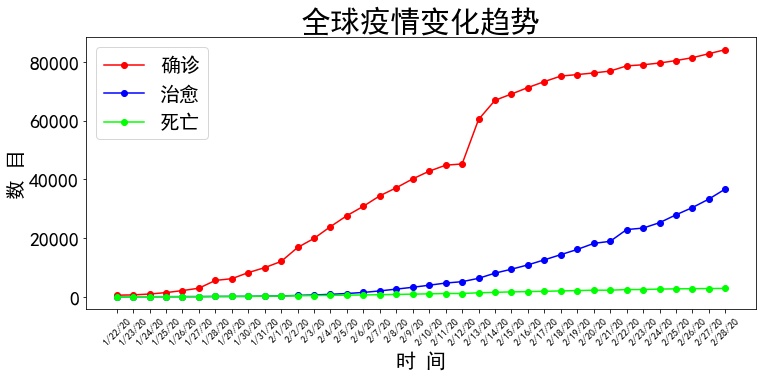

In [10]:
plt.figure(figsize=(12,5))
plt.plot(all_confirmed,c='r',label='确诊',marker ='o')
plt.plot(all_recovered,c = 'b',label = '治愈',marker = 'o')
plt.plot(all_deaths,c = 'lime',label = '死亡',marker = 'o')
plt.xticks(rotation=45,size=10)
plt.yticks(size=20)
plt.xlabel('时 间',size = 20)
plt.ylabel('数 目',size = 20)
plt.title('全球疫情变化趋势',size = 30)
plt.legend(loc = "upper left",fontsize = 20)
plt.show()

新冠肺炎确诊病例还在持续增加，治愈数也在持续增长，死亡数很少

In [11]:
#中国大陆新冠肺炎的情况
last_update='2/28/20' #设置最新数据日期
China_cases=confirmed[['Province/State',last_update]][confirmed['Country/Region']=='Mainland China']
China_cases['recovered']=recovered[[last_update]][recovered['Country/Region']=='Mainland China']
China_cases['deaths']=deaths[[last_update]][deaths['Country/Region']=='Mainland China']
China_cases = China_cases.set_index('Province/State')
China_cases = China_cases.rename(columns = {last_update:'confirmed'})
China_cases

,confirmed,recovered,deaths
Province/State,,,
Anhui,990,821,6
Beijing,410,257,7
Chongqing,576,422,6
Fujian,296,235,1
Gansu,91,82,2
Guangdong,1348,935,7
Guangxi,252,168,2
Guizhou,146,112,2
Hainan,168,133,5


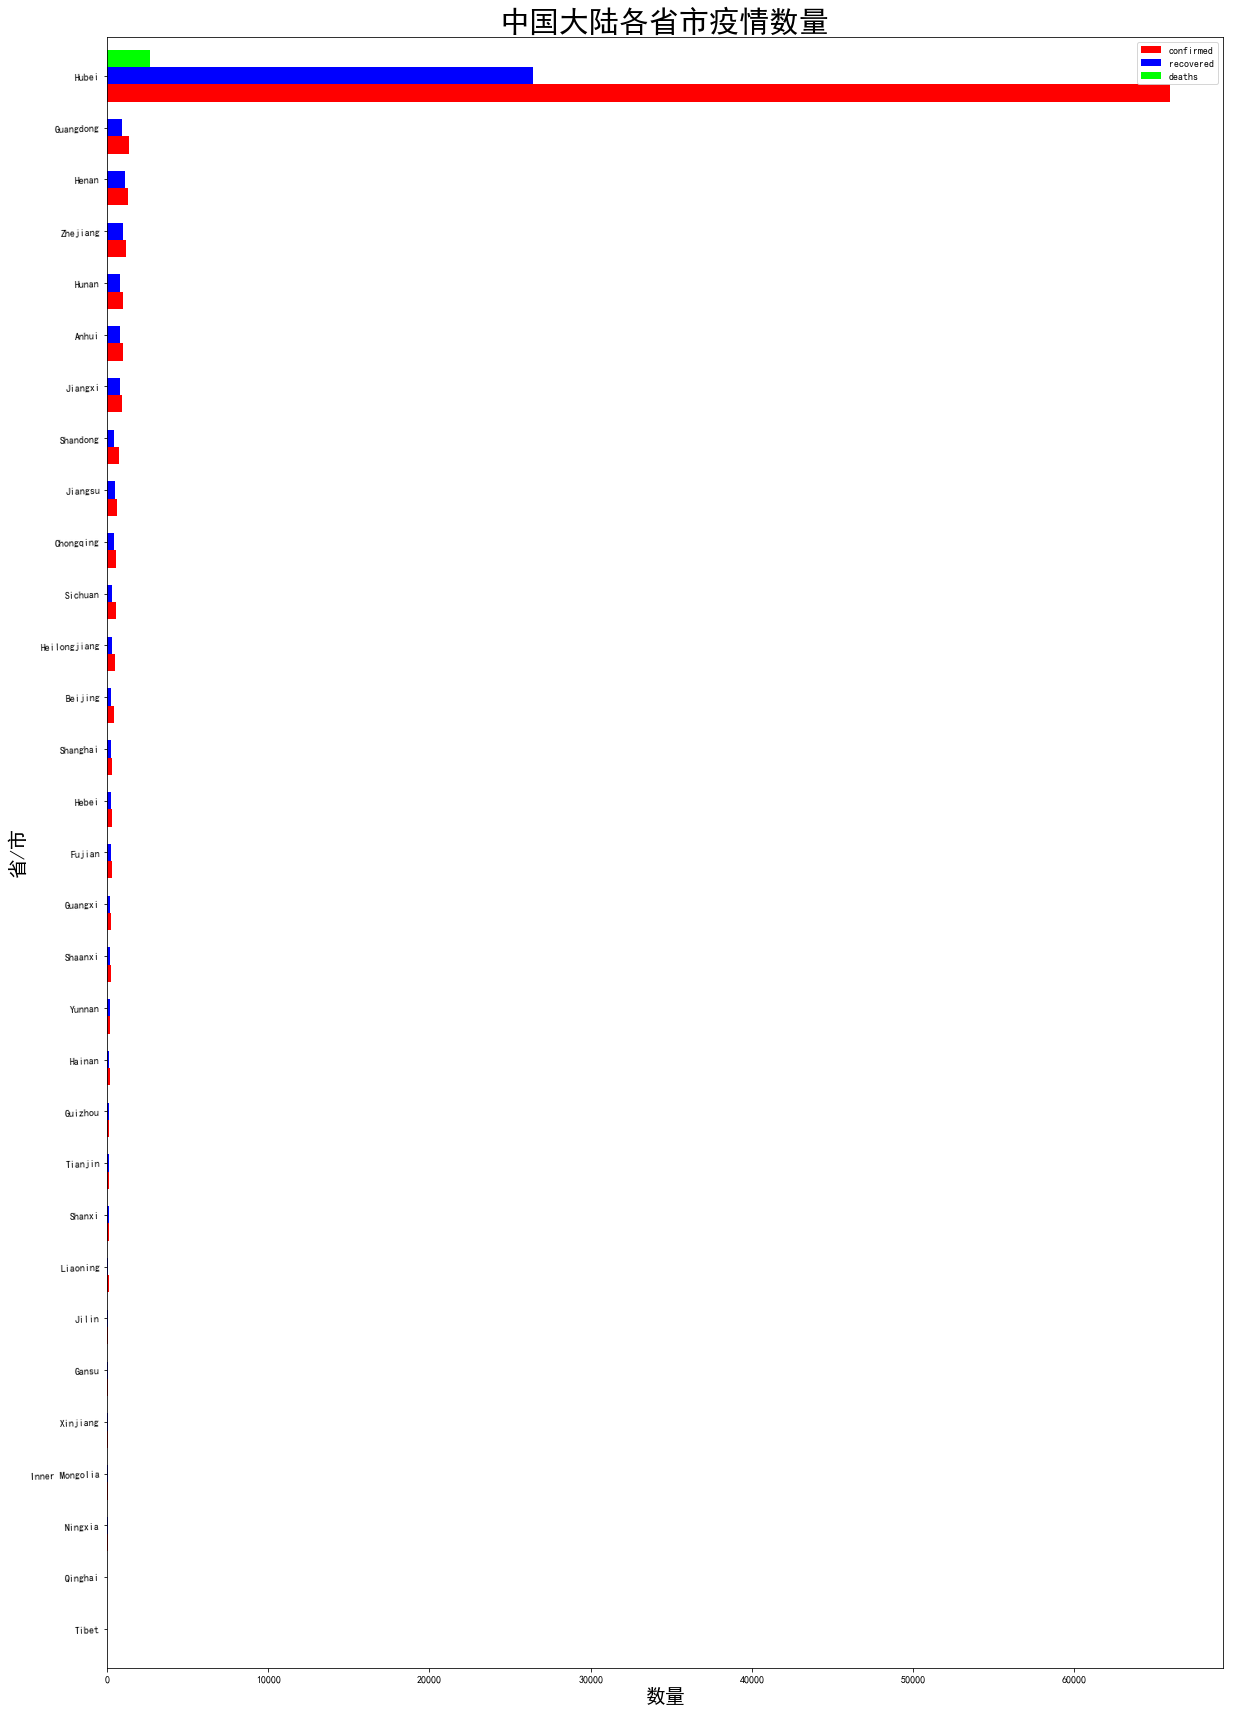

In [12]:
#中国大陆每个省份的疫情数量图
Mainland_china = China_cases.sort_values(by='confirmed',ascending=True)
Mainland_china.plot(kind='barh', figsize=(20,30), color = ['red','blue','lime'], width=1, rot=2)
plt.title('中国大陆各省市疫情数量',size=30)
plt.ylabel('省/市',size=20)
plt.xlabel('数量',size = 20)
plt.show()

可以看到，湖北省三项数据高居第一位，且远远高于其他省份。

In [13]:
#中国大陆治愈率、死亡率
confirmed_china = confirmed[confirmed['Country/Region']=='Mainland China']
confirmed_china = np.sum(confirmed_china.iloc[:,4:])
recovered_china = recovered[recovered['Country/Region'] == 'Mainland China']
recovered_china = np.sum(recovered_china.iloc[:,4:])
deaths_china = deaths[deaths['Country/Region'] == 'Mainland China']
deaths_china = np.sum(deaths_china.iloc[:,4:])
recover_rate = (recovered_china/confirmed_china)*100
recover_rate1=(recover_rate/100).apply(lambda x: format(x, '.2%'))
death_rate = (deaths_china/confirmed_china)*100
death_rate1 = (death_rate/100).apply(lambda x: format(x, '.2%'))
re_de=pd.DataFrame({'治愈率':recover_rate1,'死亡率':death_rate1})
re_de


,治愈率,死亡率
1/22/20,5.12%,3.11%
1/23/20,4.69%,2.82%
1/24/20,3.93%,2.84%
1/25/20,2.79%,3.00%
1/26/20,2.38%,2.72%
1/27/20,2.03%,2.86%
1/28/20,1.84%,2.38%
1/29/20,1.98%,2.19%
1/30/20,1.66%,2.10%
1/31/20,2.19%,2.18%


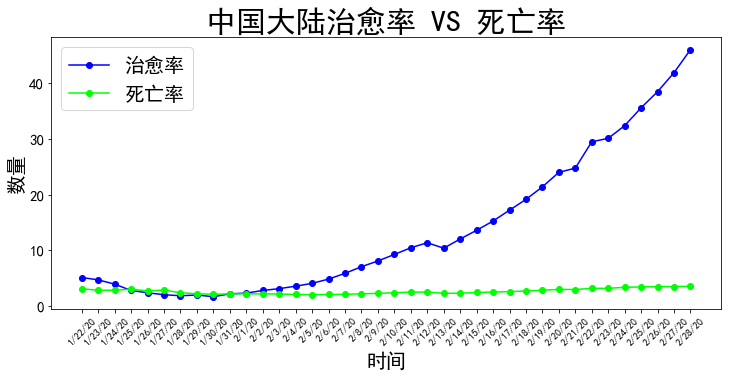

In [15]:
plt.figure(figsize=(12,5))
plt.plot(recover_rate, color = 'blue', label = '治愈率', marker = 'o')
plt.plot(death_rate, color = 'lime', label = '死亡率', marker = 'o')
plt.title('中国大陆治愈率 VS 死亡率',size=30)
plt.ylabel('数量',size=20)
plt.xlabel('时间',size=20)
plt.xticks(rotation=45,size=10)
plt.yticks(size=15)
plt.legend(loc = "upper left",fontsize = 20)
plt.show()

在1月25日-1月31日期间死亡率略高于治愈率，但其他时间段，治愈率远远高于死亡率

In [16]:
#除中国大陆之外其他地区治愈率死亡率
confirmed_others = confirmed[confirmed['Country/Region'] != 'Mainland China']
confirmed_others = np.sum(confirmed_others.iloc[:,4:])
recovered_others = recovered[recovered['Country/Region'] != 'Mainland China']
recovered_others = np.sum(recovered_others.iloc[:,4:])
deaths_others = deaths[deaths['Country/Region'] != 'Mainland China']
deaths_others = np.sum(deaths_others.iloc[:,4:])
other_recover_rate = (recovered_others/confirmed_others)*100
other_recover_rate1=(other_recover_rate/100).apply(lambda x: format(x, '.2%'))
other_death_rate = (deaths_others/confirmed_others)
other_death_rate1 = (other_death_rate/100).apply(lambda x: format(x, '.2%'))
other_re_de=pd.DataFrame({'治愈率':other_recover_rate1,'死亡率':other_death_rate1})
other_re_de

,治愈率,死亡率
1/22/20,0.00%,0.00%
1/23/20,0.00%,0.00%
1/24/20,0.00%,0.00%
1/25/20,0.00%,0.00%
1/26/20,5.36%,0.00%
1/27/20,4.69%,0.00%
1/28/20,7.14%,0.00%
1/29/20,6.25%,0.00%
1/30/20,7.27%,0.00%
1/31/20,5.56%,0.00%


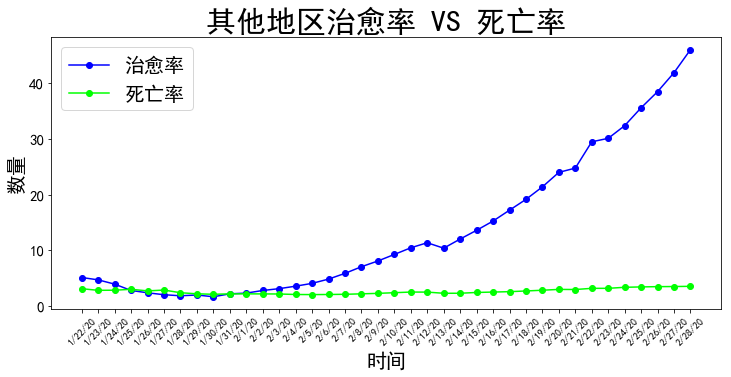

In [17]:
plt.figure(figsize=(12,5))
plt.plot(recover_rate, color = 'blue', label = '治愈率', marker = 'o')
plt.plot(death_rate, color = 'lime', label = '死亡率', marker = 'o')
plt.title('其他地区治愈率 VS 死亡率',size=30)
plt.ylabel('数量',size=20)
plt.xlabel('时间',size=20)
plt.xticks(rotation=45,size=10)
plt.yticks(size=15)
plt.legend(loc = "upper left",fontsize = 20)
plt.show()

In [18]:
#世界其他地区疫情数量
others = confirmed[['Country/Region',last_update]][confirmed['Country/Region'] != 'Mainland China']
others['recovered'] = recovered[[last_update]][recovered['Country/Region'] != 'Mainland China']
others['death'] = deaths[[last_update]][deaths['Country/Region'] != 'Mainland China']
others_countries = others.rename(columns = {last_update:'confirmed'})
others_countries = others_countries.set_index('Country/Region')
others_countries = others_countries.groupby('Country/Region').sum()
others_countries

,confirmed,recovered,death
Country/Region,,,
Azerbaijan,1,0,0
Afghanistan,1,0,0
Algeria,1,0,0
Australia,23,11,0
Austria,3,0,0
Bahrain,36,0,0
Belarus,1,0,0
Belgium,1,1,0
Brazil,1,0,0


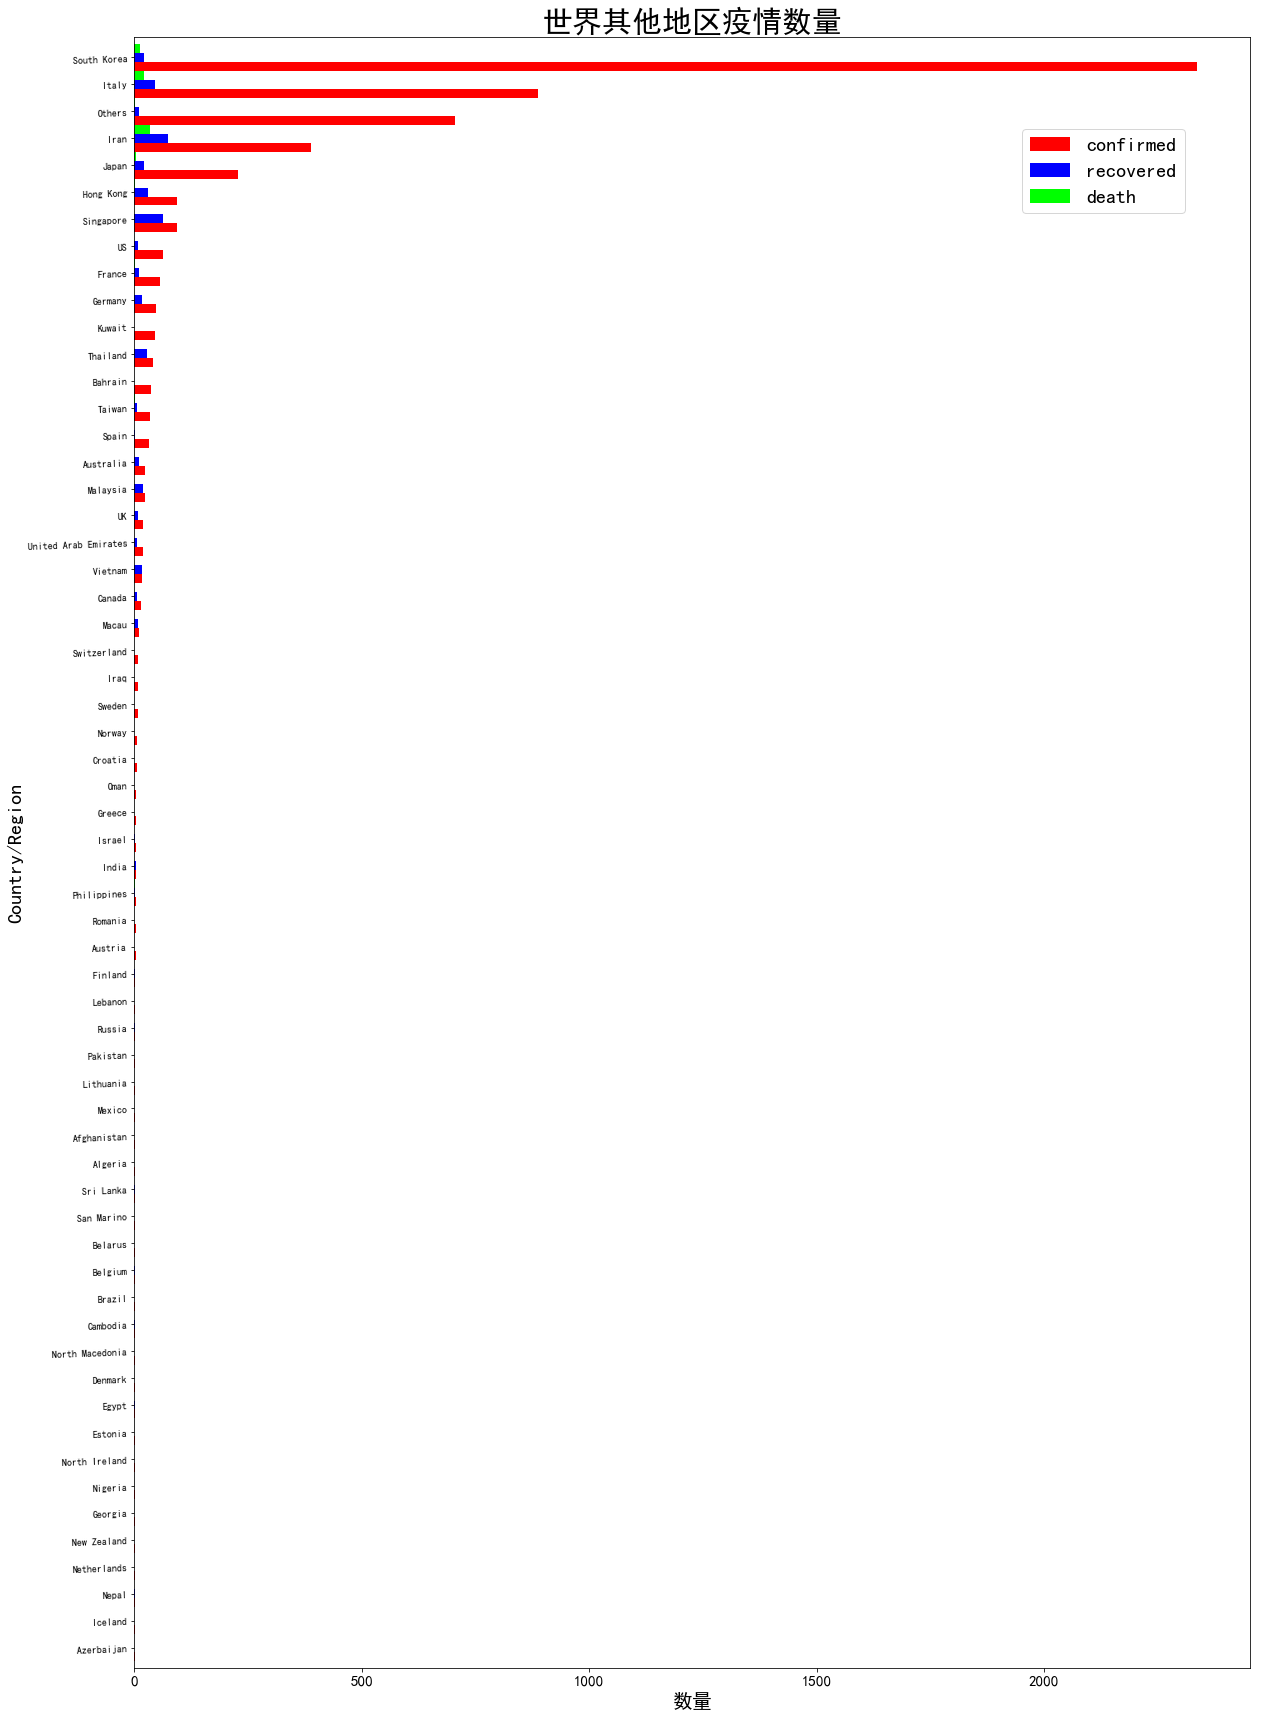

In [19]:
others_countries.sort_values(by = 'confirmed',ascending = True).plot(kind='barh', figsize=(20,30), color = ['red','blue','lime'], width=1, rot=2)
plt.title('世界其他地区疫情数量', size=30)
plt.ylabel('Country/Region',size = 20)
plt.xlabel('数量',size = 20)
plt.yticks(size=10)
plt.xticks(size=15)
plt.legend(bbox_to_anchor=(0.95,0.95),fontsize = 20)
plt.show()

从图可以看到，韩国，意大利，日本这些地区也有很多新冠肺炎患者。

## 3. 绘制疫情地图

In [20]:
# 疫情地图数据
others=confirmed[['Country/Region','Lat','Long',last_update]][confirmed['Country/Region'] != 'Mainland China']
others['recovered'] = recovered[[last_update]][recovered['Country/Region'] != 'Mainland China']
others['death'] = deaths[[last_update]][deaths['Country/Region'] != 'Mainland China']
others_countries = others.rename(columns = {last_update:'confirmed'})
others_countries.loc['94'] = ['Mainland China',30.9756,112.2707,confirmed_china[-1],recovered_china[-1],deaths_china[-1]]
others_countries

,Country/Region,Lat,Long,confirmed,recovered,death
31,Thailand,15.0000,101.0000,41,28,0
32,Japan,36.0000,138.0000,228,22,4
33,South Korea,36.0000,128.0000,2337,22,13
34,Taiwan,23.7000,121.0000,34,6,1
35,US,47.6062,-122.3321,1,1,0
36,US,41.8781,-87.6298,2,2,0
37,US,33.4255,-111.9400,1,1,0
38,Macau,22.1667,113.5500,10,8,0
39,Hong Kong,22.3000,114.2000,94,30,2
40,Singapore,1.2833,103.8333,93,62,0


In [21]:
import folium
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')


定义一个world_map对象；location的格式为[纬度,经度]；zoom_start表示初始地图的缩放尺寸，数值越大放大程度越大；tiles为地图类型，用于控制绘图调用的地图样式，默认为'OpenStreetMap'，也有一些其他的内建地图样式，如'Stamen  Terrain'、'Stamen Toner'、'Mapbox Bright'、'Mapbox Control Room'等；也可以传入'None'来绘制一个没有风格的朴素地图，或传入一个URL来使用其它的自选osm。

In [22]:
for lat, lon, value, name in zip(others_countries['Lat'], others_countries['Long'], others_countries['confirmed'], others_countries['Country/Region']):
    folium.CircleMarker([lat, lon],
    radius=10,
    popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
    '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
     color='red',
     fill_color='red',
     fill_opacity=0.7 ).add_to(world_map)

popup：str型或folium.Popup()对象输入，用于控制标记部件的具体样式（folium内部自建了许多样式），默认为None，即不显示部件。代码使用的是自定义的网页样式，其中<strong>表示加粗，<br>表示换行，以便将各个数据显示出来。

In [23]:
world_map

这是一种可交互的地图，可以随意移动缩放，鼠标点击地图上红点，即可出现地区的疫情信息。

**用plotly绘制每日疫情扩散地图**

In [24]:
import plotly.express as px

In [25]:
#确诊数
confirmed = confirmed.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date',value_name = 'confirmed') 
confirmed.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0


melt函数，它将列名转换为列数据(columns name → column values)，重构DataFrame

主要参数说明:
- id_vars:不需要被转换的列名。
- value_vars:需要转换的列名，如果剩下的列全部都要转换，就不用写了。
- var_name和value_name是自定义设置对应的列名。


In [26]:
#把date列转换成datetime格式
confirmed['date_dt'] = pd.to_datetime(confirmed.date, format="%m/%d/%y")
confirmed.date = confirmed.date_dt.dt.date
confirmed.rename(columns={'Country/Region': 'country', 'Province/State': 'province'}, inplace=True)
#confirmed

In [27]:
#治愈数、死亡数
recovered = recovered.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date',value_name = 'recovered')
recovered['date_dt'] = pd.to_datetime(recovered.date, format="%m/%d/%y")
recovered.date = recovered.date_dt.dt.date
recovered.rename(columns={'Country/Region': 'country', 'Province/State': 'province'}, inplace=True)

In [28]:
deaths = deaths.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name = 'deaths')
deaths['date_dt'] = pd.to_datetime(deaths.date, format="%m/%d/%y")
deaths.date = deaths.date_dt.dt.date
deaths.rename(columns={'Country/Region': 'country', 'Province/State': 'province'}, inplace=True)

In [29]:
#将三种数据合并在一起
merge_on = ['province', 'country', 'date']
all_date = confirmed.merge(deaths[merge_on + ['deaths']], how='left', on=merge_on). \
merge(recovered[merge_on + ['recovered']], how='left', on=merge_on)

用实心圆来表示每个地区的疫情变化，而实心圆的大小则代表了三种数据的大小，所以在我们的数据里要加一列，使用confirmed数据的二分之一次方来表示实心圆的大小。

In [30]:
Coronavirus_map = all_date.groupby(['date_dt', 'province'])['confirmed', 'deaths','recovered', 'Lat', 'Long'].max().reset_index()
Coronavirus_map['size'] = Coronavirus_map.confirmed.pow(0.5)  # 创建实心圆大小
Coronavirus_map['date_dt'] = Coronavirus_map['date_dt'].dt.strftime('%Y-%m-%d')

In [31]:
fig = px.scatter_geo(Coronavirus_map, lat='Lat', lon='Long',scope='asia',
color="size", size='size', hover_name='province',
hover_data=['confirmed', 'deaths', 'recovered'],
projection="natural earth",animation_frame="date_dt",
title='亚洲地区疫情扩散图')
fig.update(layout_coloraxis_showscale=False)
fig.show()